## Employee database analysis
* The histogram underlines the negative proportionality between the number of employees and the salary. In fact, the number of employees decreases as wages increase. From over 140,000 employees to a salary in the range of 40,000 - 45,000, the number of employees falls below 60,000 for salaries of 45,000 and then continues to drop significantly until reaching a number of employees well below 5,000 when the salary exceeds 85000

* As regards the average salary for titles as evidenced by the bar chart, senior staff and staff have the highest average salaries reaching almost 60,000. For other job titles, the average salaries are below 50,000 except for the manager title, which slightly exceeds that amount.  

In [6]:
#dependencies
import pandas as pd
from sqlalchemy import create_engine
import os
from db_connection import user,ps,host,port
import matplotlib.pyplot as plt

In [7]:
 # variables to populate the database connection string
db_user = user
db_password = ps
db_host = host
db_port = port

In [8]:
#confirming the database existence
db_name = "employee_db"

In [9]:
#Create engine to connect to employee_db
engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')


## Creating a histogram to visualize the most common salary ranges for employees.

In [10]:
#importing the dataframe from postgresql
salary = pd.read_sql_table("salaries",engine)
salary.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [11]:
#retreiving only salary
sal = salary["salary"]
sal

0         60117
1         65828
2         40006
3         40054
4         78228
          ...  
300019    40000
300020    58058
300021    49597
300022    40000
300023    63707
Name: salary, Length: 300024, dtype: int64

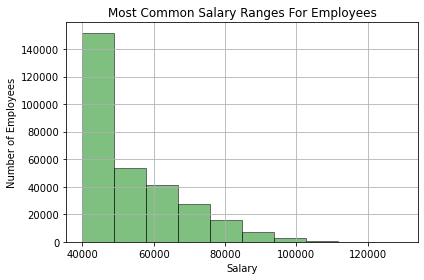

In [12]:
#plotting histogram
plt.hist(sal, bins=10, facecolor="green", alpha=0.5, edgecolor="black")
plt.xlabel("Salary")
plt.ylabel("Number of Employees")
plt.title("Most Common Salary Ranges For Employees")
plt.grid()
plt.tight_layout()
plt.show()

## Creating a bar chart of average salary by title.

In [13]:
query = """select title, salary
from employees
inner join salaries
on employees.emp_no = salaries.emp_no
inner join titles
on titles.title_id = employees.emp_title_id;"""

T_salary = pd.read_sql_query(query,engine)
T_salary.head()


,title,salary
0,Engineer,48973
1,Senior Engineer,40000
2,Technique Leader,43548
3,Staff,63377
4,Senior Engineer,40000


In [14]:
#retreiving the average salary
avg_salary = T_salary.groupby(T_salary["title"])["salary"].mean()
avg_salary

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

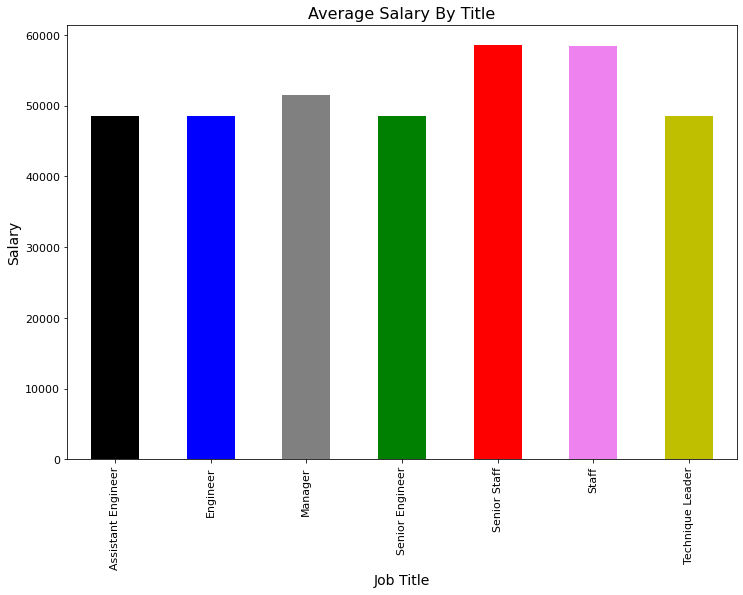

In [15]:
avg_salary.plot.bar(figsize = (12,8), color=["black", "blue","grey", "green", "red", "violet", "y"], fontsize = 11)
plt.xlabel("Job Title", fontsize = 14)
plt.ylabel("Salary",  fontsize = 14)
plt.title("Average Salary By Title",fontsize = 16)
plt.show()